In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# First dataset: All memes

In [18]:
DATASET_PATH = 'MMHS150K/MMHS150K.csv'

dataset = pd.read_csv(DATASET_PATH)
label_dict = {0: 'No hate speech', 1: 'Racist', 2: 'Sexist', 3: 'Homophobe', 4: 'Religion', 5: 'Other hate'}

# is there a text on the image?
dataset['text_in_image'] = dataset['img_text'].isna().apply(lambda x: not x)

display(dataset)

,index,img_url,labels,tweet_url,tweet_text,labels_str,tweet_text_clean,img_text,text_in_image,hate_speech,binary_hate,split
0,1114679353714016256,http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...,"[4, 1, 3]",https://twitter.com/user/status/11146793537140...,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"['Religion', 'Racist', 'Homophobe']",<tag> Nigga,#YOUNGERU SAVE IT,True,1.000000,1,train
1,1063020048816660480,http://pbs.twimg.com/ext_tw_video_thumb/106301...,"[5, 5, 5]",https://twitter.com/user/status/10630200488166...,My horses are retarded https://t.co/HYhqc6d5WN,"['OtherHate', 'OtherHate', 'OtherHate']",My horses are retarded,NaN,False,1.000000,1,train
2,1108927368075374593,http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg,"[0, 0, 0]",https://twitter.com/user/status/11089273680753...,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"['NotHate', 'NotHate', 'NotHate']",“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,NaN,False,0.000000,0,train
3,1114558534635618305,http://pbs.twimg.com/ext_tw_video_thumb/111401...,"[1, 0, 0]",https://twitter.com/user/status/11145585346356...,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"['Racist', 'NotHate', 'NotHate']",RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,NaN,False,0.333333,0,train
4,1035252480215592966,http://pbs.twimg.com/media/Dl30pGIU8AAVGxO.jpg,"[1, 0, 1]",https://twitter.com/user/status/10352524802155...,“EVERYbody calling you Nigger now!” https://t....,"['Racist', 'NotHate', 'Racist']",“EVERYbody calling you Nigger now!”,NaN,False,0.666667,1,val
...,...,...,...,...,...,...,...,...,...,...,...,...
149818,1114170734472048640,http://pbs.twimg.com/tweet_video_thumb/D3ZUXNw...,"[2, 5, 0]",https://twitter.com/user/status/11141707344720...,@svdate @gtconway3d I would just say hes Donny...,"['Sexist', 'OtherHate', 'NotHate']",<tag><tag> I would just say hes Donny the retard,LATE MOGIF LATE MOTIV,True,0.666667,1,train
149819,1110368198786846720,http://pbs.twimg.com/ext_tw_video_thumb/111036...,"[0, 0, 0]",https://twitter.com/user/status/11103681987868...,@Cheftime_Dev congrats my nigga keep on grindi...,"['NotHate', 'NotHate', 'NotHate']",<tag> congrats my nigga keep on grinding,ON AIR Elapsed Time: 05.47:18 Select Your Leve...,True,0.000000,0,train
149820,1106941858540851200,http://pbs.twimg.com/media/D1yluGmXgAEKNG5.jpg,"[0, 1, 0]",https://twitter.com/user/status/11069418585408...,My nigga big shitty https://t.co/e0snJGBgH9,"['NotHate', 'Racist', 'NotHate']",My nigga big shitty,NaN,False,0.333333,0,train
149821,1105268309233188865,http://pbs.twimg.com/tweet_video_thumb/D1azqiz...,"[1, 0, 0]",https://twitter.com/user/status/11052683092331...,did she just say “my nigga” to Rich? &amp; she...,"['Racist', 'NotHate', 'NotHate']",did she just say “my nigga” to Rich? &amp; she...,NaN,False,0.333333,0,train


In [19]:
# Count the number of each label
label_count = np.zeros(6)

# Go trough each row of the dataset
for index, row in dataset.iterrows():
    # Get the label of the current row
    labels = row['labels'][1:-1].split(',')
    
    for label in labels:
        label_count[int(label)] += 1

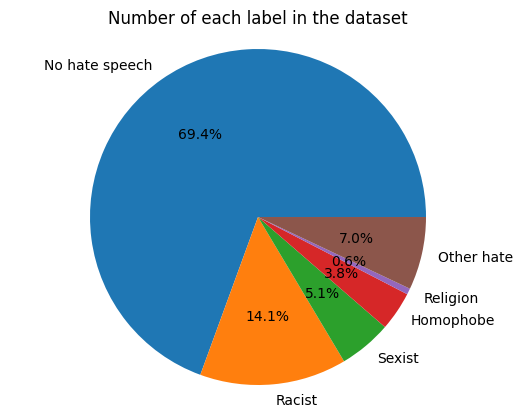

In [20]:
# Plot the number of each label in a camembert
fig, ax = plt.subplots()
ax.pie(label_count, labels=label_dict.values(), autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Number of each label in the dataset')
plt.show()

Due to very unbalanced class, we will work with a binary label: Hate or No Hate.

Then, we still have 3 labels per tweet, do we do a majority vote to decide the label of the tweet? Or do we consider the tweet as a multi-label classification problem?

/var/folders/0g/yd41q8010pn2lvl2qx960v240000gn/T/ipykernel_35049/1088432438.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(sorted([f'{i:.2f}' for i in dataset["hate_speech"].unique()]))


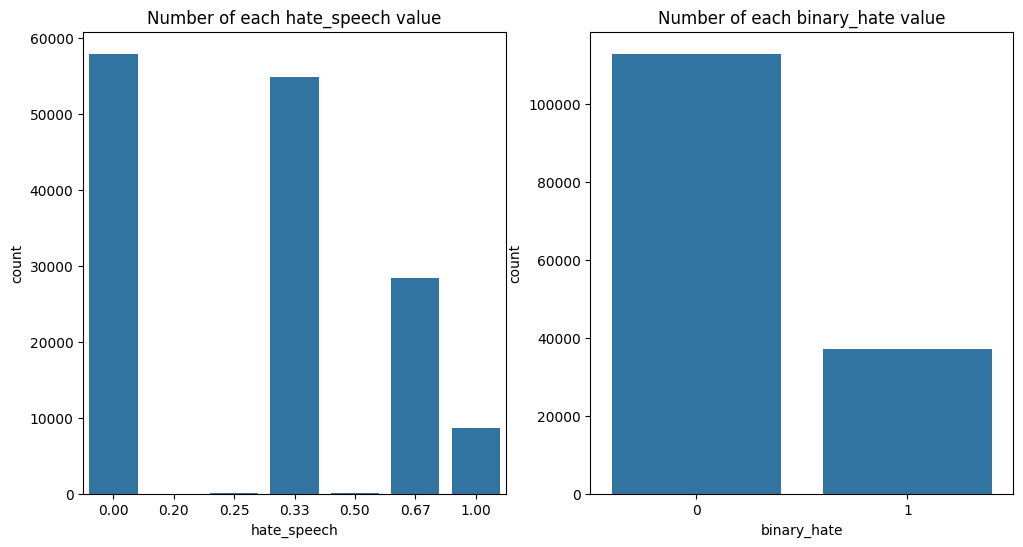

In [21]:
# Plot on the left the barplot of hate_speech and on the right of binary_hate
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='hate_speech', data=dataset, ax=ax[0])
ax[0].set_title('Number of each hate_speech value')
ax[0].set_xticklabels(sorted([f'{i:.2f}' for i in dataset["hate_speech"].unique()]))
sns.countplot(x='binary_hate', data=dataset, ax=ax[1])
ax[1].set_title('Number of each binary_hate value')
plt.show()

If we compute an average of the 3 labels, we can have a value between 0 and 1, but as seen in the previous plots, the average get only one out of mainly 4 values: 0, 0.33, 0.67, 1, which are not at all balanced. We decide to do a majority vote to decide the label of the tweet.

Let's check the distribution in the split datasets.

In [22]:
print('Size of the dataset:', dataset.shape[0])
print('Size of the training set:', dataset[dataset['split'] == 'train'].shape[0])
print('Size of the validation set:', dataset[dataset['split'] == 'val'].shape[0])
print('Size of the test set:', dataset[dataset['split'] == 'test'].shape[0])

Size of the dataset: 149823
Size of the training set: 134823
Size of the validation set: 5000
Size of the test set: 10000


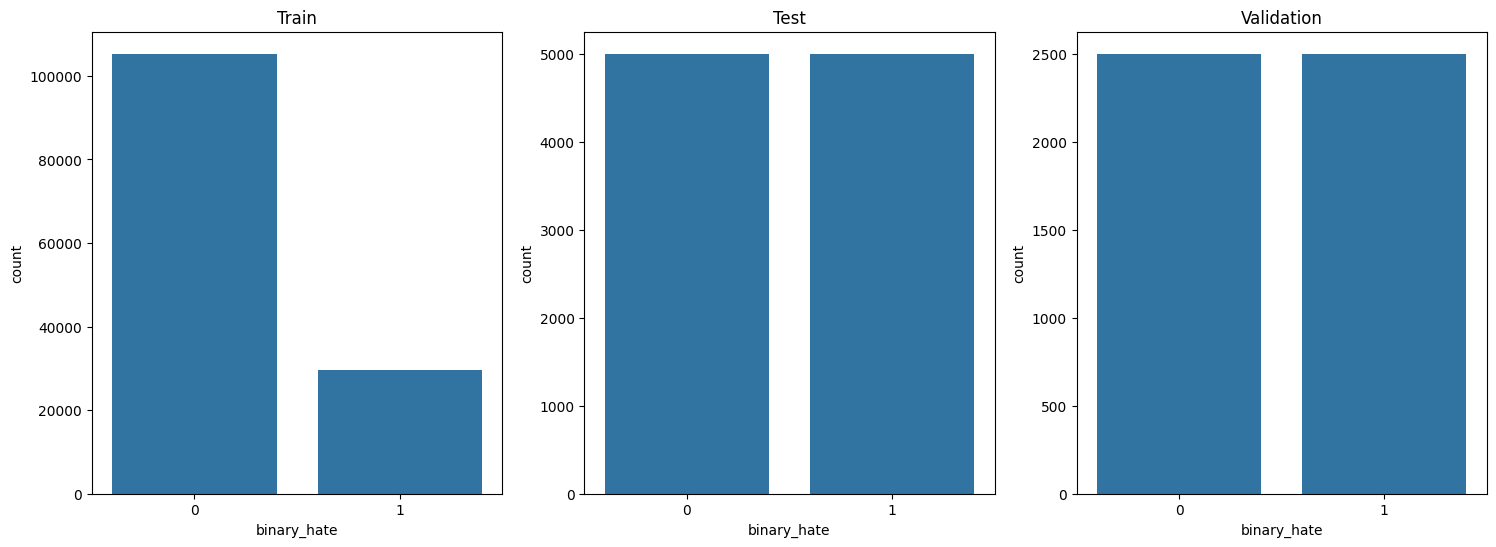

In [23]:
# Separate the data into train, test and val and plot binary_hate
train = dataset[dataset['split'] == 'train']
test = dataset[dataset['split'] == 'test']
val = dataset[dataset['split'] == 'val']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='binary_hate', data=train, ax=ax[0])
ax[0].set_title('Train')
sns.countplot(x='binary_hate', data=test, ax=ax[1])
ax[1].set_title('Test')
sns.countplot(x='binary_hate', data=val, ax=ax[2])
ax[2].set_title('Validation')
plt.show()

Will have to rebalance the train set, or work with only a part of it.

Let's look at the presence of text in the images.

In [24]:
# How many tweets have text on the image (img_text not NaN)
print('Number of tweets with text on the image:', dataset['img_text'].count())
print('Number of tweets without text on the image:', len(dataset) - dataset['img_text'].count())
print(f'Percentage of tweets with text on the image: {dataset["img_text"].count() / len(dataset) * 100:.2f}%')

Number of tweets with text on the image: 59252
Number of tweets without text on the image: 90571
Percentage of tweets with text on the image: 39.55%


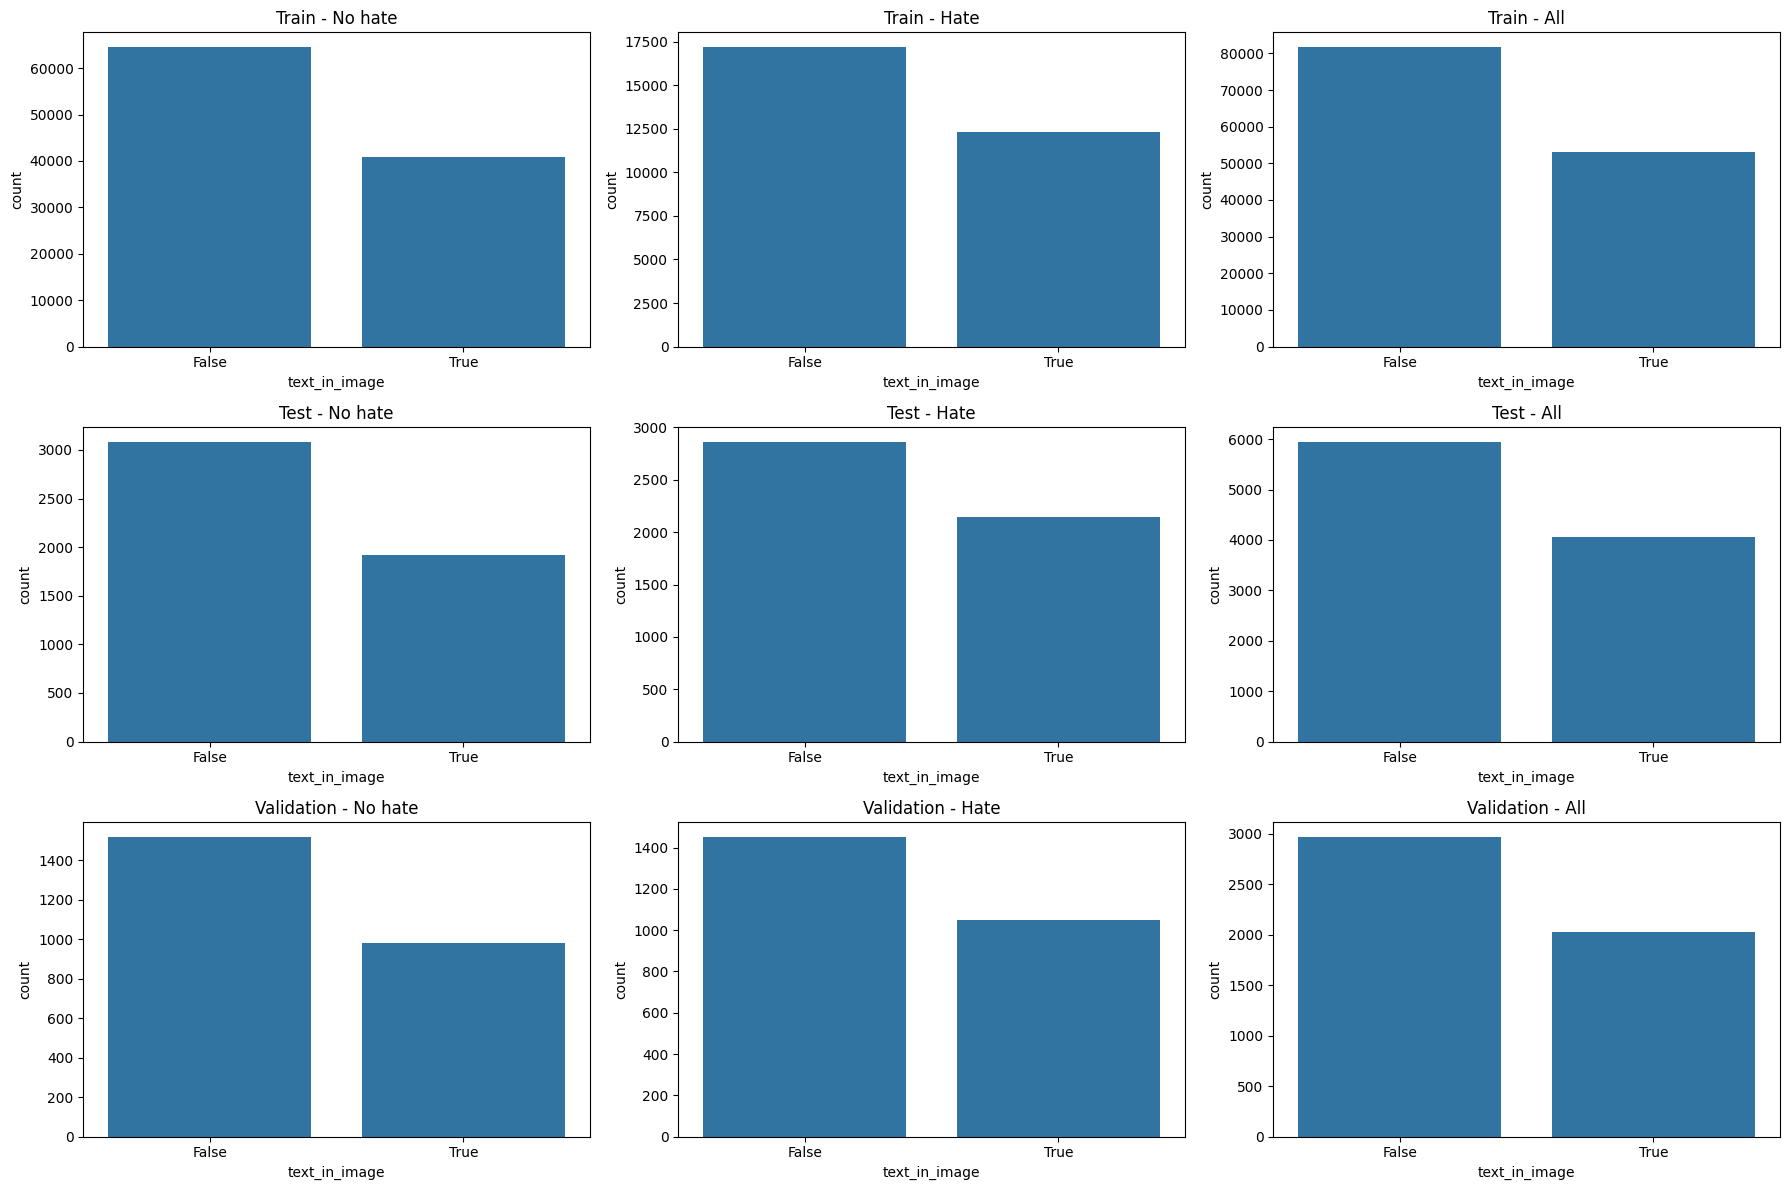

In [25]:
# For the three datasets, separate in hate and no hate and plot number of tweets with text on the image
fig, ax = plt.subplots(3, 3, figsize=(18, 12))

# Train
sns.countplot(x='text_in_image', data=train[train['binary_hate'] == 0], ax=ax[0][0])
ax[0][0].set_title('Train - No hate')
sns.countplot(x='text_in_image', data=train[train['binary_hate'] == 1], ax=ax[0][1])
ax[0][1].set_title('Train - Hate')
sns.countplot(x='text_in_image', data=train, ax=ax[0][2])
ax[0][2].set_title('Train - All')

# Test
sns.countplot(x='text_in_image', data=test[test['binary_hate'] == 0], ax=ax[1][0])
ax[1][0].set_title('Test - No hate')
sns.countplot(x='text_in_image', data=test[test['binary_hate'] == 1], ax=ax[1][1])
ax[1][1].set_title('Test - Hate')
sns.countplot(x='text_in_image', data=test, ax=ax[1][2])
ax[1][2].set_title('Test - All')

# Validation
sns.countplot(x='text_in_image', data=val[val['binary_hate'] == 0], ax=ax[2][0])
ax[2][0].set_title('Validation - No hate')
sns.countplot(x='text_in_image', data=val[val['binary_hate'] == 1], ax=ax[2][1])
ax[2][1].set_title('Validation - Hate')
sns.countplot(x='text_in_image', data=val, ax=ax[2][2])
ax[2][2].set_title('Validation - All')

plt.tight_layout()
plt.show()

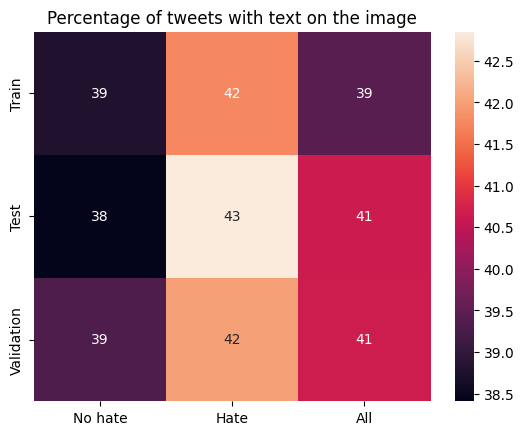

In [26]:
# Compute percentage of tweets with text on the image for each of the previous plots and do heatmap
percentage_img_text = np.zeros((3, 3))

# Train
percentage_img_text[0][0] = train[train['binary_hate'] == 0]['img_text'].count() / len(train[train['binary_hate'] == 0]) * 100
percentage_img_text[0][1] = train[train['binary_hate'] == 1]['img_text'].count() / len(train[train['binary_hate'] == 1]) * 100
percentage_img_text[0][2] = train['img_text'].count() / len(train) * 100

# Test
percentage_img_text[1][0] = test[test['binary_hate'] == 0]['img_text'].count() / len(test[test['binary_hate'] == 0]) * 100
percentage_img_text[1][1] = test[test['binary_hate'] == 1]['img_text'].count() / len(test[test['binary_hate'] == 1]) * 100
percentage_img_text[1][2] = test['img_text'].count() / len(test) * 100

# Validation
percentage_img_text[2][0] = val[val['binary_hate'] == 0]['img_text'].count() / len(val[val['binary_hate'] == 0]) * 100
percentage_img_text[2][1] = val[val['binary_hate'] == 1]['img_text'].count() / len(val[val['binary_hate'] == 1]) * 100
percentage_img_text[2][2] = val['img_text'].count() / len(val) * 100

# Plot the heatmap
fig, ax = plt.subplots()
sns.heatmap(percentage_img_text, annot=True, xticklabels=['No hate', 'Hate', 'All'], yticklabels=['Train', 'Test', 'Validation'])
ax.set_title('Percentage of tweets with text on the image')
plt.show()

# Second dataset: keeping only 'real' memes

We will keep only the memes that have text in them.

In [27]:
# Load second dataset (with tweet with text on the image)
DATASET_PATH = 'MMHS150K/MMHS150K_text_in_image.csv'
dataset2 = pd.read_csv(DATASET_PATH)

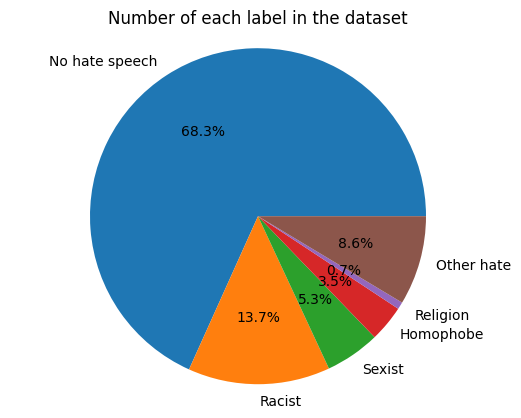

In [28]:
# Count the number of each label
label_count = np.zeros(6)

# Go trough each row of the dataset
for index, row in dataset2.iterrows():
    # Get the label of the current row
    labels = row['labels'][1:-1].split(',')
    
    for label in labels:
        label_count[int(label)] += 1
        
# Plot the number of each label in a camembert
fig, ax = plt.subplots()
ax.pie(label_count, labels=label_dict.values(), autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Number of each label in the dataset')
plt.show()

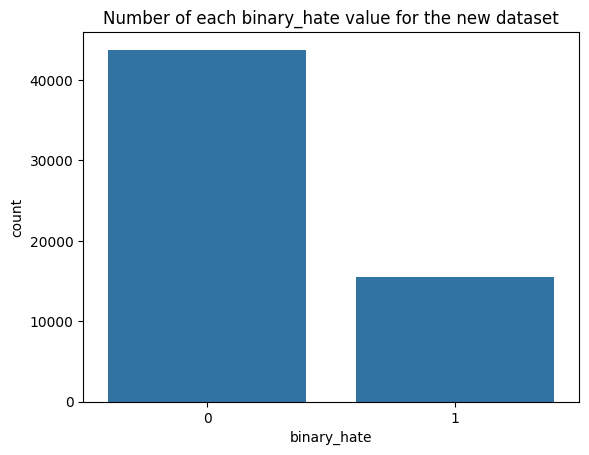

In [29]:
# Plot binary_hate for the new dataset
fig, ax = plt.subplots()
sns.countplot(x='binary_hate', data=dataset2, ax=ax)
ax.set_title('Number of each binary_hate value for the new dataset')
plt.show()

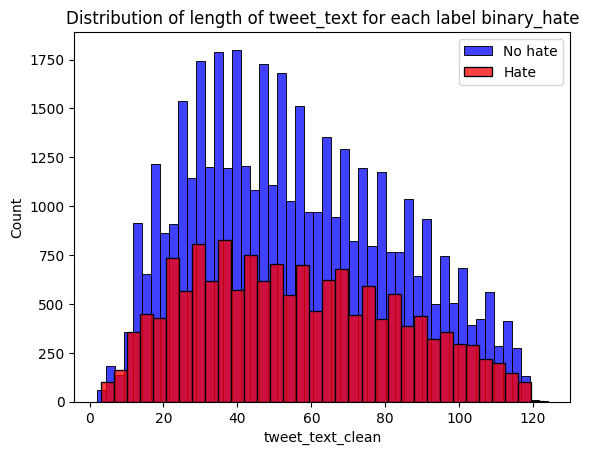

In [30]:
# Plot distribution of length of tweet_text for each label binary_hate
fig, ax = plt.subplots()
sns.histplot(dataset2[dataset2['binary_hate'] == 0]['tweet_text_clean'].str.len(), ax=ax, color='blue', label='No hate')
sns.histplot(dataset2[dataset2['binary_hate'] == 1]['tweet_text_clean'].str.len(), ax=ax, color='red', label='Hate')
ax.set_title('Distribution of length of tweet_text for each label binary_hate')
plt.legend()
plt.show()

95th percentile of number of words in img_text: 53.0


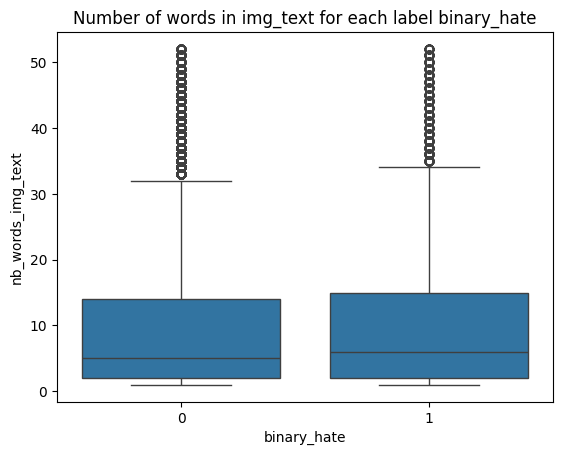

In [31]:
# Compute number of words in img_text
dataset2['nb_words_img_text'] = dataset2['img_text'].apply(lambda x: len(x.split()))

print("95th percentile of number of words in img_text:", dataset2['nb_words_img_text'].quantile(0.95))

dataset3 = dataset2[dataset2['nb_words_img_text'] < dataset2['nb_words_img_text'].quantile(0.95)]

# Box plot of number of words in img_text for each label binary_hate
fig, ax = plt.subplots()
sns.boxplot(x='binary_hate', y='nb_words_img_text', data=dataset3, ax=ax)
ax.set_title('Number of words in img_text for each label binary_hate')
plt.show()

In [32]:
display(dataset3)

,index,img_url,labels,tweet_url,tweet_text,labels_str,tweet_text_clean,img_text,hate_speech,binary_hate,split,nb_words_img_text
0,1114679353714016256,http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...,"[4, 1, 3]",https://twitter.com/user/status/11146793537140...,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"['Religion', 'Racist', 'Homophobe']",<tag> Nigga,#YOUNGERU SAVE IT,1.000000,1,train,3
1,1113920043568463874,http://pbs.twimg.com/media/D3VwYEKW4AYz4vk.jpg,"[5, 1, 1]",https://twitter.com/user/status/11139200435684...,@WhiteHouse @realDonaldTrump Fuck ice. White s...,"['OtherHate', 'Racist', 'Racist']",<tag><tag> Fuck ice. White supremacist trash. ...,"Hello, White Nationalist. Good-bye. Others wil...",1.000000,1,train,15
2,1114588617693966336,http://pbs.twimg.com/media/D3fQcCCWAAIG8tO.jpg,"[0, 0, 0]",https://twitter.com/user/status/11145886176939...,Day’s a cunt https://t.co/Ie6QZReHsw,"['NotHate', 'NotHate', 'NotHate']",Day’s a cunt,Dad's a Cunt Mum's a Cunt Nan's a Cunt Kids ar...,0.000000,0,train,28
3,1045809514740666370,http://pbs.twimg.com/media/DoN2KFmXcAAIT-Y.jpg,"[3, 3, 0]",https://twitter.com/user/status/10458095147406...,#sissy faggot https://t.co/bm1nk8HcYO,"['Homophobe', 'Homophobe', 'NotHate']",#sissy faggot,EVERY SISSY GIRL SHOULD KNOW THAT MEN ARE WIZA...,0.666667,1,val,28
4,1116702448016556035,http://pbs.twimg.com/tweet_video_thumb/D39S8tb...,"[0, 0, 0]",https://twitter.com/user/status/11167024480165...,@DefNotJerm So.... you turn to twitter for it ...,"['NotHate', 'NotHate', 'NotHate']",<tag> So.... you turn to twitter for it instea...,SBURG,0.000000,0,train,1
...,...,...,...,...,...,...,...,...,...,...,...,...
59246,1063608944919306246,http://pbs.twimg.com/tweet_video_thumb/DsKystH...,"[0, 0, 0]",https://twitter.com/user/status/10636089449193...,SJW Blackmailed Into Submission https://t.co/D...,"['NotHate', 'NotHate', 'NotHate']",SJW Blackmailed Into Submission,et Datnoid Arwen,0.000000,0,train,3
59247,1056595445215059969,http://pbs.twimg.com/media/DqnH9QYVYAAKgDj.jpg,"[1, 0, 1]",https://twitter.com/user/status/10565954452150...,New Video: Spice – Black Hypocrisy https://t.c...,"['Racist', 'NotHate', 'Racist']",New Video: Spice – Black Hypocrisy,vevo,0.666667,1,train,1
59248,1107387893541232642,http://pbs.twimg.com/media/D147aqyX0AICbzE.jpg,"[0, 0, 0]",https://twitter.com/user/status/11073878935412...,@EcholsEli Nigga Ricardo literally givin out n...,"['NotHate', 'NotHate', 'NotHate']",<tag> Nigga Ricardo literally givin out n-word...,Ricardo wants to grant you a free n-word pass!...,0.000000,0,train,14
59249,1105465552544374786,http://pbs.twimg.com/tweet_video_thumb/D1dnDez...,"[0, 1, 1]",https://twitter.com/user/status/11054655525443...,@quisLaFlare Good luck my nigga 🤘🏾 https://t.c...,"['NotHate', 'Racist', 'Racist']",<tag> Good luck my nigga 🤘🏾,YOU CAN DO IT,0.666667,1,train,4


In [49]:
# Load means_stds.csv
DATASET_PATH = 'MMHS150K/means_stds.csv'
means_stds = pd.read_csv(DATASET_PATH)
display(means_stds)

mean_red = means_stds['mean_red'].values[0]
mean_green = means_stds['mean_green'].values[0]
mean_blue = means_stds['mean_blue'].values[0]

std_red = means_stds['std_red'].values[0]
std_green = means_stds['std_green'].values[0]
std_blue = means_stds['std_blue'].values[0]


,mean_red,mean_green,mean_blue,std_red,std_green,std_blue
0,110.166338,100.106521,97.521173,83.137514,79.686139,78.860886


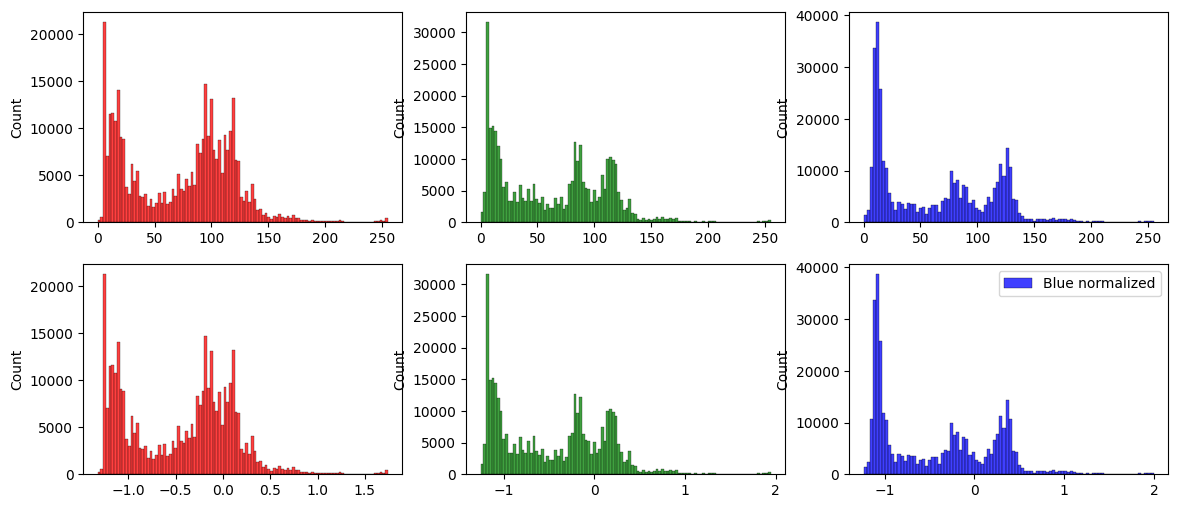

In [54]:
# Load a random image and display it
from PIL import Image

img_path = 'MMHS150K/img_resized/' + str(dataset2['index'][0]) + '.jpg'
img = np.array(Image.open(img_path), dtype=float)

# Use means and stds to normalize the image
img_norm = img.copy()
img_norm[:, :, 0] = (img_norm[:, :, 0] - mean_red) / std_red
img_norm[:, :, 1] = (img_norm[:, :, 1] - mean_green) / std_green
img_norm[:, :, 2] = (img_norm[:, :, 2] - mean_blue) / std_blue

# Display the pixel values distribution for both images
fig, ax = plt.subplots(2, 3, figsize=(14, 6))
sns.histplot(img[:, :, 0].flatten(), ax=ax[0][0], color='red', label='Red original')
sns.histplot(img[:, :, 1].flatten(), ax=ax[0][1], color='green', label='Green original')
sns.histplot(img[:, :, 2].flatten(), ax=ax[0][2], color='blue', label='Blue original')
sns.histplot(img_norm[:, :, 0].flatten(), ax=ax[1][0], color='red', label='Red normalized')
sns.histplot(img_norm[:, :, 1].flatten(), ax=ax[1][1], color='green', label='Green normalized')
sns.histplot(img_norm[:, :, 2].flatten(), ax=ax[1][2], color='blue', label='Blue normalized')
plt.legend()
plt.show()